# **Центральная предельная теорема своими руками**

В качестве непрерывного распределения выбрал распределение Парето. Подробнее о нем можно почить на [Википедии](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE)



Испортируем необходимые для исследования библиотеки и модули

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math

Определим функцию плотности вероятности и моменты случайной величины, имеющей распределение Парето

Функция плотности вероятности:<br> $f_X(x) = kx^k_m/x^k+1$ , при $x >= x_m$ <br>$f_X(x) = 0$ при $x < x_m$

Определим мат. ожидание и дисперсию в соответствии с распределением Парето:

Мат. ожидание:<br> $E[x]=x(m)k/k−1$  , где $x(m)$-минимальное значение (в scipy.pareto по умолчанию $x(m)=1)$, а k -> это параметр b - "коэффициент кривизны"

Дисперсия:<br>
$E[x]=(x(m)k/k−1)^2 * (k/k-2)$, при $k > 2$

В расчетах будем пользоваться коэффициентом кривизны, равным $3$


In [3]:
#посчитаем мат ожидание(среднее) и дисперсию
xm=1.#минимальное значение
k=3.# k -> это параметр b - "коэффициент кривизны"
E=(xm*k)/(k-1)#мат ожидание(среднее)
D=(E**2)*(k/(k-2))#дисперсия
print (E)
print (D)

1.5
6.75


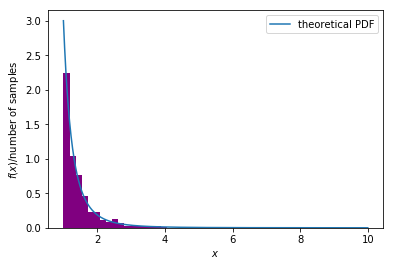

In [4]:
#генерируем выборку объема 1000
pareto = sts.pareto(b=3)#задаем функцию
sample = pareto.rvs(1000)#генерируем случайную выборку из 1000 значений
x = np.linspace(1,10,1000)#определяем массив точек для построения плотности распределения
pdf = pareto.pdf(x)#вычисляем значения плотности распределения от выборки
#строим гистрограмму выборки и теоретическую функцию распределения
plt.plot(x, pdf, label='theoretical PDF')
plt.hist(sample, bins =50, range=(1,10), density = True, color = 'purple')
plt.ylabel('$f(x)$/number of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

Оценим распределение выборочного среднего случайной величины при разных объёмах выборок

при n = 5

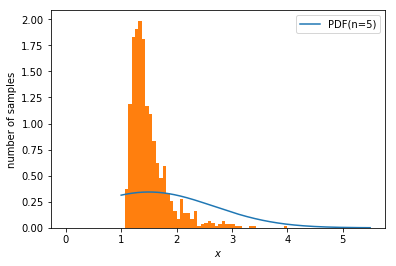

In [5]:
n=5
sample5=np.array([])#обозначим массив выборочных средних
i=1
while i <= 1000:#цикл генерации случайных выборок количества n из функции
    sample5i = pareto.rvs(n)#генерация выборки
    mean5i=sum(sample5i)/n#определение выборочного среднего (в.с.)
    sample5=np.append(sample5,mean5i)#добавляем в массив новое значение в.с.
    i+=1
#определим параметры нормального распределения описывающие массив 1000 в.с. при n=5
E=1.5#среднее Парето
D=6.75#дисперсия Парето
D5=D/n#дисперсия для нормального распределения приближающего выборку средних
sigma5=math.sqrt(D5)#сигма для нормального распределения выборки средних
norm5 = sts.norm(E, sigma5)#определяем нормальное распределение с расчетными характеристиками Парето
pdf5 = norm5.pdf(x[:500])#получаем плотность распределения
#строим гистограмму массива средних при n=5 и плотность описывающую этот массив нормального распределения
plt.plot(x[:500], pdf5, label='PDF(n=5)')
plt.hist(sample5, bins =80, range=(0,5), density=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

при n = 30

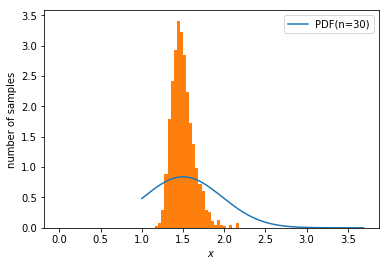

In [6]:
n=30
sample30=np.array([])#обозначим массив выборочных средних
i=1
while i <= 1000:#цикл генерации случайных выборок количества n из функции
    sample30i = pareto.rvs(n)#генерация выборки
    mean30i=sum(sample30i)/n#определение выборочного среднего (в.с.)
    sample30=np.append(sample30,mean30i)#добавляем в массив новое значение в.с.
    i+=1
#определим параметры нормального распределения описывающие массив 1000 в.с. при n=30
E=1.5#среднее Парето
D=6.75#дисперсия Парето
D30=D/n#дисперсия для нормального распределения приближающего выборку средних
sigma30=math.sqrt(D30)#сигма для нормального распределения выборки средних
norm30 = sts.norm(E, sigma30)#определяем нормальное распределение с расчетными характеристиками Парето
pdf30 = norm30.pdf(x[:300])#получаем плотность распределения
#строим гистограмму массива средних при n=30 и плотность описывающую этот массив нормального распределения
plt.plot(x[:300], pdf30, label='PDF(n=30)')
plt.hist(sample30, bins =80, range=(0,3), density=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

при n = 100

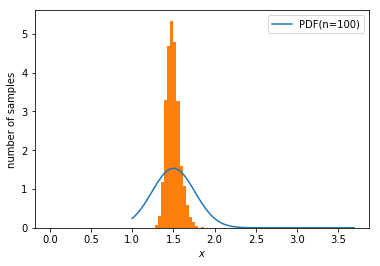

In [7]:
n=100
sample100=np.array([])#обозначим массив выборочных средних
i=1
while i <= 1000:#цикл генерации случайных выборок количества n из функции
    sample100i = pareto.rvs(n)#генерация выборки
    mean100i=sum(sample100i)/n#определение выборочного среднего (в.с.)
    sample100=np.append(sample100,mean100i)#добавляем в массив новое значение в.с.
    i+=1
#определим параметры нормального распределения описывающие массив 1000 в.с. при n=100
E=1.5#среднее Парето
D=6.75#дисперсия Парето
D100=D/n#дисперсия для нормального распределения выборки средних
sigma100=math.sqrt(D100)#сигма для нормального распределения выборки средних
norm100 = sts.norm(E, sigma100)#определяем нормальное распределение с расчетными характеристиками Парето
pdf100 = norm100.pdf(x[:300])#получаем плотность распределения
#строим гистограмму массива средних при n=100 и плотность описывающую этот массив нормального распределения
plt.plot(x[:300], pdf100, label='PDF(n=100)')
plt.hist(sample100, bins =80, range=(0,3), density=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

при n = 500

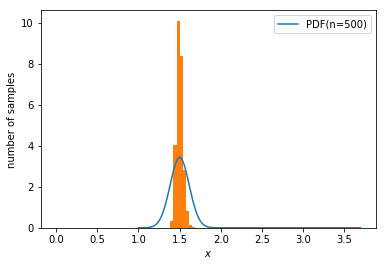

In [8]:
n=500
sample500=np.array([])#обозначим массив выборочных средних
i=1
while i <= 1000:#цикл генерации случайных выборок количества n из функции
    sample500i = pareto.rvs(n)#генерация выборки
    mean500i=sum(sample500i)/n#определение выборочного среднего (в.с.)
    sample500=np.append(sample500,mean500i)#добавляем в массив новое значение в.с.
    i+=1
#определим параметры нормального распределения описывающие массив 1000 в.с. при n=500
E=1.5#среднее Парето
D=6.75#дисперсия Парето
D500=D/n#дисперсия для нормального распределения выборки средних
sigma500=math.sqrt(D500)#сигма для нормального распределения выборки средних
norm500 = sts.norm(E, sigma500)#определяем нормальное распределение с расчетными характеристиками Парето
pdf500 = norm500.pdf(x[:300])#получаем плотность распределения
#строим гистограмму массива средних при n=500 и плотность описывающую этот массив нормального распределения
plt.plot(x[:300], pdf500, label='PDF(n=500)')
plt.hist(sample500, bins =80, range=(0,3), density=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

при n = 1000

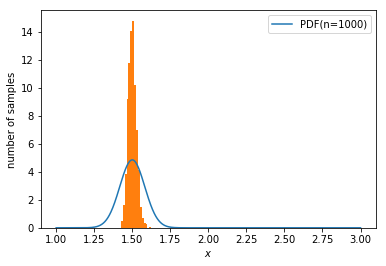

In [9]:
n=1000
y = np.linspace(1,3,1000)
sample1000=np.array([])#обозначим массив выборочных средних
i=1
while i <= 1000:#цикл генерации случайных выборок количества n из функции
    sample1000i = pareto.rvs(n)#генерация выборки
    mean1000i=sum(sample1000i)/n#определение выборочного среднего (в.с.)
    sample1000=np.append(sample1000,mean1000i)#добавляем в массив новое значение в.с.
    i+=1
#определим параметры нормального распределения описывающие массив 1000 в.с. при n=1000
E=1.5#среднее Парето
D=6.75#дисперсия Парето
D1000=D/n#дисперсия для нормального распределения выборки средних
sigma1000=math.sqrt(D1000)#сигма для нормального распределения выборки средних
norm1000 = sts.norm(E, sigma1000)#определяем нормальное распределение с расчетными характеристиками Парето
pdf1000 = norm1000.pdf(y)#получаем плотность распределения
#строим гистограмму массива средних при n=1000 и плотность описывающую этот массив нормального распределения
plt.plot(y, pdf1000, label='PDF(n=1000)')
plt.hist(sample1000, bins =80, range=(1,2), density=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

# ВЫВОДЫ

Из списка доступных в модуле SciPy функций  была выбрана функция распределения Парето. Условия задачи выполнены: из выбранного распределения была сгенерирована выборка объемом 1000, построенна гистограмма с теоретической плотностью распределения. Оценено распределение выборочного среднего при разных объёмах выборок n(5, 30, 100, 500, 1000), измерены их выборочные средние и составлены соостветствующие массивы, по массивам выборочных средних построены гистограммы распределения, исходя из теоретических данных определены соответствующие каждому n параметры распределений для апроксимации, по полученным параметрам построены функции нормального распределения для каждого n поверх соответствующих гистограмм.<br><br>
Исследование в очередной раз подтвердило выводы центральной предельной теоремы о приближении независимых случайно распределенных величин к нормальному распределению с ростом объема выборки, хотя и в итоговый результат внесены искажения из-за особенностей функции Парето, главным из которых является граница значений, что приводит к ограничению искомой апроксимирующей функции. Так же заметна скошенность проявляющаяся в несимметричности распределения относительно центра. Из-за перечисленных недостатков функция сходится медленно, и более качественный результат наблюдается при больших n, например, при n = 1000